In [295]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import re

fig = plt.gcf()
fig.set_size_inches(20, 5)

<Figure size 1440x360 with 0 Axes>

In [296]:
def plot_single_file(filename):
    data = pd.read_csv(filename)
    plt.plot(data['time(ms)'], data['voltage(V)'], label=filename)

# plot_single_file('data/1_4_100_1')
# plot_single_file('data/1_4_100_2')

In [297]:
def plot_file(filename):
    data_x = pd.read_csv(filename + "_1") # input
    data_y = pd.read_csv(filename + "_2") # output
    plt.title(filename)
    plt.scatter(data_x['voltage(V)'], data_y['voltage(V)'], s=1, label=filename)

In [298]:
def plot_files(filenames, mix = False):
    for filename in filenames:
        if (not mix):
            plt.figure()
        plot_file(filename)
        plt.legend()

['/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_4', '/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_5', '/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_6', '/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_7', '/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_8', '/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_9', '/Users/lwh/CLionProjects/ce_device/test/data/1_1_200_10']


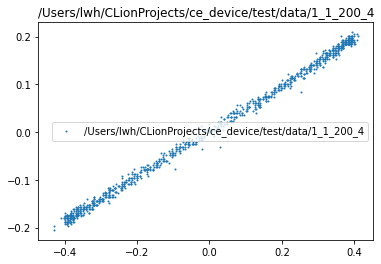

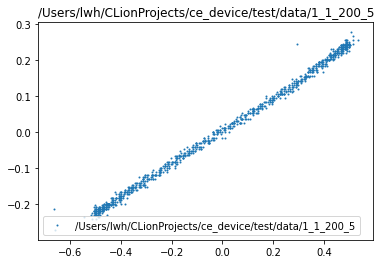

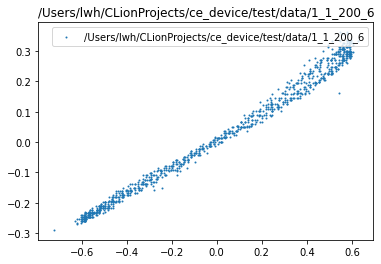

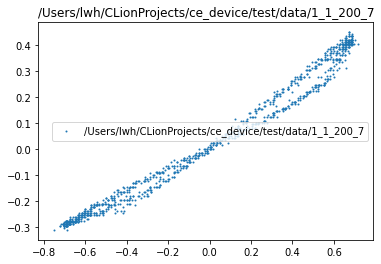

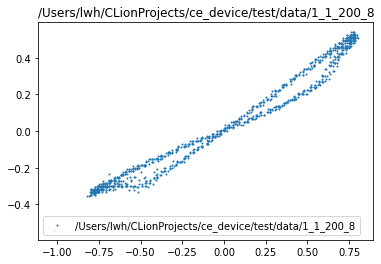

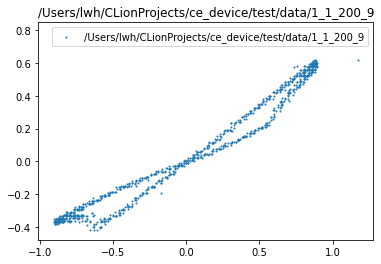

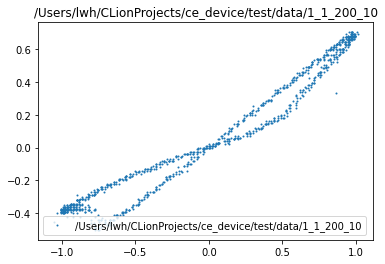

In [332]:
tree = ET.parse('data/meta.xml')
root = tree.getroot()

def get_real_value(key, test):
    text_value = test.find(key).text
    if (key == 'voltage'):
        return float(text_value)
    elif (key == 'file'):
        return text_value
    else:
        return int(text_value)

def is_valid(dic, test):
    v = False
    if (test.find('frequency').text == '200' and float(test.find('voltage').text) == 0.5):
        v = True
    for key in dic.keys():
        real_value = get_real_value(key, test)
        if (key == 'file'):
            if (not re.search(dic[key], real_value)):
                return False
        elif (real_value != dic[key]):
            return False
    return True
    
def filter(dic):
    keys = list(dic.keys())
    filenames = []
    for test in root.findall('test'):
        if (is_valid(dic, test)):
            filenames.append(test.find('file').text)
    return filenames


# filenames = filter({"frequency": 200, "voltage": 0.5})
# filenames = filter({"frequency": 200})
filenames = filter({"file": "1_200"})

print(filenames)
plot_files(filenames)
# plot_files(filenames, True)